# 11장 - 레이블되지 않은 데이터 다루기: 군집 분석

In [1]:
from IPython.display import Image

이전 장들에서는 정답을 알고 있는 데이터를 사용하여 머신 러닝 모델을 구축하기 위해 지도 학습 기법을 사용했다.  
즉, 훈련 데이터에 이미 클래스 레이블이 부여되어 있다.   

이 장에서는 방향을 바꾸어 **비지도 학습**(unsupervised learning)의 한 분야인 군집 분석(clustering analysis)을 살펴본다. 이 기법을 사용하면 정답을 모르는 데이터 안에서 숨겨진 구조를 찾을 수 있다. 

# K-평균 알고리즘을 사용하여 유사한 객체 그룹핑

가장 잘 알려진 **군집**(clustering)알고리즘 중 하나인 **k-평균**(k-means)을 배운다.  
군집은 비슷한 객체로 이루어진 그룹을 찾는 기법이다. 한 그룹 안의 객체들은 다른 그룹에 있는 객체보다 더 관련되어 있다.  
군집에 대한 상용 애플리케이션의 예로는 문서나 음악, 영화를 여러 주제의 그룹으로 모으는 경우를 들 수 있다. 또는 추천 엔진에서 하듯이 구매 이력의 공통 부분을 기반으로 관심사가 비슷한 고객을 찾는 것이다.

## 사이킷런을 사용한 k-평균 군집

k-평균 알고리즘은 **프로토타입 기반 군집**(prototype-based clustering)에 속한다.  
프로토타입 기반 군집은 각 클러스터가 하나의 프로토타입으로 표현된다는 뜻이다. 프로토타입은 연속적인 특성에서는 비슷한 데이터 포인트의 **센트로이드**(centroid)(평균)이거나, 범주형 특성에서는 메도이드(medoid)(가장 대표되는 포인트나 가장 자주 등장하는 포인트)가 된다.  
k-평균 알고리즘이 원형 클러스터를 구분하는 데 뛰어나지만, 이 알고리즘 단점은 사전에 클러스터 개수 k를 지정해야 하는 것이다. 적절하지 않은 k를 고르면 군집 성능이 좋지 않다. 

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

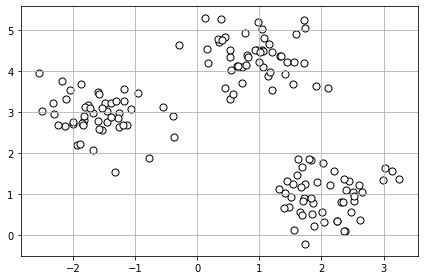

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_01.png', dpi=300)
plt.show()

랜덤하게 생성된 150개의 포인트로 구성되어 있다. 2차원 산점도로 그려 보면 세 개의 밀집된 그룹을 형성하고 있다.  

실제 군집 애플리케이션에서는 샘플에 대한 진짜 카테고리 정보(추론이 아니라 실증적인 정보)가 전혀 없다. 클래스 레이블이 있다면 이 작업은 지도 학습에 해당한다. 그러므로 여기서 목표는 특성의 유사도에 기초하여 샘플을 그룹으로 모으는 것이다. 이런 문제에 사용할 수 있는 k-평균 알고리즘은 다음 네 단계로 요약된다.  
1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택한다.
2. 각 샘플을 가장 가까운 센트로이드 $\mu^{(j)}, j\in \{1,\cdots,k \}$에 할당한다.
3. 할당된 샘플들의 중심으로 센트로이드를 이용한다.
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복한다.  

그럼 샘플 간의 유사도를 어떻게 측정할까? 거리의 반대 개념으로 유사도를 정의할 수 있다. 연속적인 특성을 가진 샘플을 클러스터로 묶는 데 널리 사용되는 거리는 m-차원 공간에 있는 두 포인트 x와 y 사이의 **유클리디안 거리의 제곱**(squared Euclidean distance)이다.  
유클리디안 거리 지표를 기반으로 간단한 최적화 문제로 k-평균 알고리즘을 기술할 수 있다. 클러스터 내 **제곱 오차합**(SSE) 또는 **클러스터 관성**(cluster inertia)을 반복적으로 최소화하는 방법이다.

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
'''
클러스터 개수를 3으로 지정. 
클러스터 개수를 사전에 지정해야 하는 것은 k-평균 알고리즘의 한계 중 하나.

n_init=10으로 설정하면 k-평균 군집 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 열 번 실행하여 
가장 낮은 SSE를 만드는 하나를 최종 모델로 선택.

max_iter 매개변수는 한 번의 실행에서 수행할 최대 반복 횟수를 지정한다. 

사이킷런의 k-평균 구현은 최대 반복 횟수에 도달하기 전에 수렴하면 일찍 종료한다. 
수렴에 문제가 있다면 tol 매개변수 값을 늘리는 것이 한 가지 방법이다.
'''

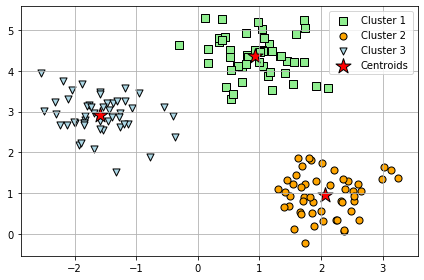

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()

k-평균이 이런 작은 데이터셋에서 잘 작동하지만 k-평균 알고리즘은 클러스터 개수 k를 사전에 지정해야 하는 중요한 단점이 있다. 클러스터 개수를 얼마로 선택할지는 실제 애플리케이션에서는 명확하지 않을 수 있다. 특히 시각화할 수 없는 고차원 데이터셋에서 그렇다.  
k-평균의 다른 특징은 클러스터가 중첩되지 않고 계층적이지 않다는 것이다. 또 각 클러스터에 적어도 하나의 샘플이 있다고 가정한다. 

## k-평균++로 초기 클러스터 센트로이드를 똑똑하게 할당

초기 센트로이드가 좋지 않게 선택되면 이따금 나쁜 군집 결과를 만들거나 수렴이 느려진다. 이 문제를 해결하는 한 가지 방법은 같은 데이터셋에서 k-평균 알고리즘을 여러 번 실행하여 SSE 입장에서 가장 성능이 좋은 모델을 선택하는 것이다.  
또 다른 방법은 k-평균++ 알고리즘을 통해 초기 센트로이드가 서로 멀리 떨어지도록 위치시키는 것이다. 이는 기본 k-평균보다 일관되고 훌륭한 결과를 만든다.  

사이킷런의 `KMeans` 클래스로 k-평균++를 사용하려면 `init` 매개변수를 `'k-means++'`로 지정하기만 하면 된다.

## 직접 군집 vs 간접 군집

**직접 군집**(hard clustering)은 데이터셋의 샘플이 정확히 하나의 클러스터에 할당되는 알고리즘 종류를 말한다. k-평균과 k-평균++ 알고리즘이 이에 해당한다.  
반대로 **간접 군집**(soft clustering)(**퍼지 군집**(fuzzy clustering)으로도 부름)알고리즘은 샘플을 하나 이상의 클러스터에 할당한다. 간접 군집의 대표적인 예는 **퍼지 C-평균**(Fuzzy C-Means, FCM) 알고리즘이다.  
k-평균 알고리즘과 비슷하게 FCM 알고리즘은 네 개의 단계로 요약할 수 있다.
1. 센트로이드 개수 k를 지정하고 랜덤하게 각 포인트에 대해 클러스터 확률을 할당한다.
2. 클러스터 센트로이드 $\mu^{(j)}, j\in \{1.\cdots,k\}$를 계산한다.
3. 각 샘플에 대해 클러스터 소속 확률을 업데이트한다.
4. 클러스터 확률이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복한다.

## 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

비지도 학습에서 가장 어려운 점 하나는 최종 답을 모른다는 것이다. 데이터셋에 진짜 클래스 레이블이 없기 때문에 지도 학습의 성능 평가를 위해 사용한 기법들을 적용할 수 없다.  
군집 품질을 평가하려면 알고리즘 자체의 지표를 사용해야 한다. 예를 들어 k-평균 군집의 성능을 비교하기 위해 클래스 내 SSE를 사용한다.

In [6]:
print('왜곡: %.2f' % km.inertia_)

왜곡: 72.48


클래스 내 SSE를 바탕으로 **엘보우 방법**이라고 하는 그래프를 사용하여 문제에 최적인 클러스터 개수 k를 추정할 수 있다.

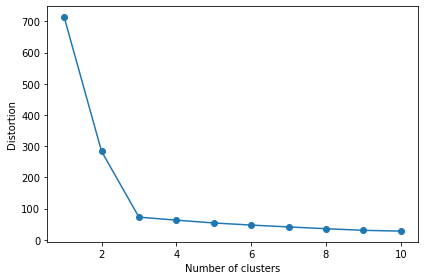

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
# plt.savefig('images/11_03.png', dpi=300)
plt.show()

k=3에서 엘보우가 나타난다. 이 데이터셋에서는 k=3이 좋은 선택임을 알 수 있다.

## 실루엣 그래프로 군집 품질을 정량화

군집 품질을 평가하는 또 다른 방법은 **실루엣 분석**(silhouette analysis)이다. 이 방법은 k-평균 이외에 이 장 뒤에서 설명할 다른 군집 알고리즘에도 적용할 수 있다.  
실루엣 분석은 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 그래프 도구이다. 데이터셋 샘플 하나에 대한 **실루엣 계수**(shilhouette coefficient)를 계산하려면 다으 ㅁ세 가지 단계를 적용한다.
1. 샘플 $x^{(j)}$와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균하여 **클러스터 응집력**(clsuter cohesion) $a^{(i)}$를 계산한다.
2. 샘플 $x^{(j)}$와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 **클러스터 분리도**(cluster separation) $b^{(i)}$를 계산한다.
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루어 $s^{(i)}$를 계산한다.


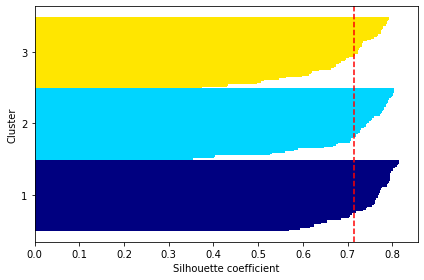

In [8]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('images/11_04.png', dpi=300)
plt.show()

실루엣 그래프를 살펴보면 클러스터 크기를 확인하고 이상치를 가진 클러스터를 구별할 수 있다.  
실루엣 계수의 값이 0에서 멀리 떨어져 있다. 이는 군집이 잘 되었다는 것을 나타낸다. 또 군집 품질을 요약하기 위해 평균 실루엣 계수를 그래프에 했다.  

나쁜 군집에 대해 실루엣 그래프가 어떻게 보이는지 알아보기 위해 두 개의 센트로이드로 k-평균 알고리즘을 적용해보자.

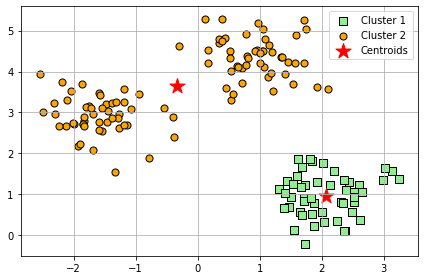

In [9]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_05.png', dpi=300)
plt.show()

결과 그래프에서 보듯이 하나의 센트로이드가 세 개의 원형 샘플 그룹 중 두 개 사이에 놓여 있다. 

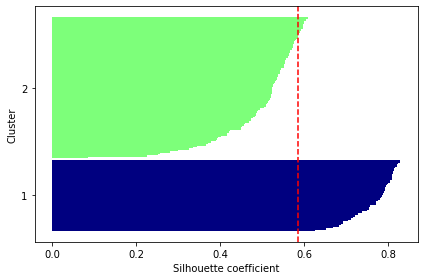

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('images/11_06.png', dpi=300)
plt.show()

만들어진 실루엣 그래프에서 보듯이 길이와 두께가 확연히 다른다. 이는 군집 결과가 나쁘거나 적어도 최적은 아니라는 증거이다.

# 계층적인 트리로 클러스터 조직화

이 절에서는 프로토타입 기반 군집의 또 다른 방법인 **계층 군집**(hierarchical clustering)을 알아본다.  
계층 군집 알고리즘의 한 가지 장점은 **덴드로그램**(dendrogram)(이진 트리 형태로 계층 군집을 시각화할 수 있는 도구)을 그릴 수 있다는 것이다. 덴드로그램은 의미 있는 분류 체계를 만들어 주므로 군집 결과를 이해하는 데 도움이 된다. 계층적인 알고리즘의 또 다른 장점은 클러스터 개수를 미리 지정할 필요가 없다는 것이다.  

계층 군집의 두 가지 방법은 **병합 계층 군집**(agglomeratice hierarchical clustering)과 **분할 계층 군집**(divisice hierarchical clustering)이다. 분할 군집에서는 전체 샘플을 포함하는 하나의 클러스테에서 시작하여 더 작은 클러스터로 반복적으로 나눈다. 이는 클러스터 안에 샘플이 하나만 남을 때까지 계속된다. 

## 상향식으로 클러스터 묶기

병합 계층 군집의 두 가지 기본 알고리즘은 **단일 연결**(single linkage)과 **완전 연결**(complete linkage)이다.  
단일 연결을 사용하면 클러스터 쌍에서 가장 비슷한 샘플 간 거리를 계산한다. 그 다음 이 거리가 가장 작은 두 클러스터를 합친다.  
완전 연결 방식은 단일 연결과 비슷하지만 클러스터 쌍에서 가장 비슷한 샘프을 비교하는 것이 아니라 가장 비슷하지 않은 샘플을 비교하여 병합을 수행한다. 

In [11]:
Image(url='https://git.io/JLdsq', width=400) 

In [12]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## 거리 행렬에서 계층 군집 수행

In [13]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist
# 샘플 데이터의 거리 대칭 행렬

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


함수 설명을 보면 `pdist`함수에서 계산한 축약된 거리 행렬을 입력 속성으로 사용할 수 있다. 아니면 `linkage` 함수에 초기 데이터 배열을 전달하고 `metric='euclidean'` 지표를 매개변수로 사용할 수 있다.  
앞서 `squareform` 함수로 만든 거리 행렬은 `linkage` 함수가 기대한 값과 다르기 때문에 사용해서는 안된다.

In [14]:
# 1. 잘못된 방식: squareform 거리 행렬

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_16864/2548429983.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [15]:
# 2. 올바른 방식: 축약된 거리 행렬

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [16]:
# 3. 올바른 방식: 입력 샘플 행렬

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


그림에서 볼 수 있듯이 연결 행렬의 행은 클러스터 병합을 나타낸다. 첫 번째와 두 번째 열은 각 클러스터에서 완전 연결 방식으로 병합된 클러스터를 나타내고, 세 번째 열은 이런 클러트 간 거리이다.  
마지막 열은 클러스터에 있는 샘플 개수이다.

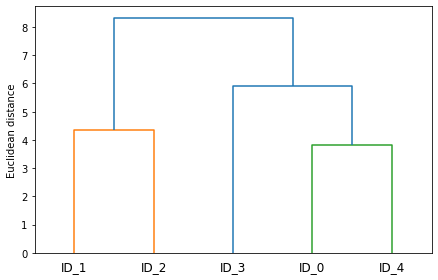

In [17]:
from scipy.cluster.hierarchy import dendrogram

# 검은색 덴드로그램 만들기 (1/2 부분만)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
# plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

위 그림과 같이 만들어진 덴드로그램의 가지가 다른 컬로 보일 것이다. 컬러는 덴드로그램의 거리 임계 값에 따라 matplotlib 컬러 코드 리스트를 순환한다.  

덴드로그램은 병합 계층 군집이 수행되는 동안에 만들어진느 클러스터들을 요약해준다. 예를 들어 `ID_0`과 `ID_4` 또 그다음 `ID_1`과 `ID_2`가 유클리디안 거리 측정을 기반으로 했을 때 가장 가까운 샘플임을 알 수 있다. 

## 히트맵에 덴드로그램 연결

실전 애플리케이션에서는 계층 군집 덴드로그램이 **히트맵**(heat map)과 함께 자주 사용된다. 히트맴을 사용하면 훈련 샘플을 담고 있는 데이터 배열이나 행렬의 개별 값을 색으로 표현할 수 있다. 

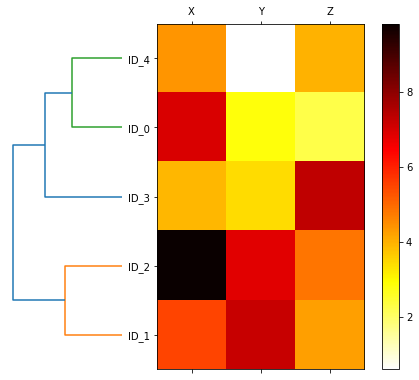

In [19]:
'''
1. 새로운 figure 객체를 만들고 add_axes 메서드를 사용해서 덴드로그램의 x축 위치, y축 위치, 너비, 높이를 지정.
그다음 덴드로그램을 반시계 방향으로 90도 회전
'''
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요
row_dendr = dendrogram(row_clusters, orientation='left')


'''
2. 그다음 파이썬 딕셔너리인 덴드로그램 객체의 leaves 키에서 얻은 클러스터 레이블을 따라
원본 DataFrame에 있는 데이터를 재정렬
'''
# 군집에 맞게 데이터를 재정렬합니다.
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]


'''
3. 재정렬된 DataFrame에서 히트맵을 만들고 덴드로그램 다음에 위치.
'''
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-위치, y-위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')



'''
4. 마지막으로 미려하게 만들기 위해 축 눈금을 제거하고 그래프 테두리 감추기.
컬러 막대를 추가하고 특성과 샘플 이름을 각각 x축 y축 눈금의 레이블로 할당.
'''
axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축을 제거합니다.
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵을 출력합니다.
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('images/11_12.png', dpi=300)
plt.show()

## 사이킷런에서 병합 군집 적용

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [1 0 0 2 1]


예측된 클러스터 레이블을 살펴보면 첫 번째와 다섯 번째 샘플(ID_0과 ID_4)이 하나의 클러스터(레이블 1)에 할당되었고, 샘플 ID_1과 ID_2가 두 번째 클러스터(레이블 0)에 할당된 것을 볼 수 있다. 샘플 ID_3은 자기 자신이 클러스터가 되었다(레이블 2).  
대체적으로 덴드로그램으로 본 것과 결과가 동일하다. 덴드로그램에서는 ID_3이 ID_1이나 ID_2보다는 ID_4와 ID_0에 더 가깝다.

In [21]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [0 1 1 0 0]


# DBSACN을 사용하여 밀집도가 높은 지역 찾기

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 알고리즘은 k-평균처럼 원형 클러스터를 가정하지 않는다.  
또 임계치를 수동으로 지정해야 하는 계층적인 방식으로 데이터셋을 나누지 않는다. 이름이 의미하듯이 밀집도 기반 군집 알고리즘은 샘플이 조밀하게 모인 지역에 클러스터 레이블을 할당한다.  
DBSCAN에서 밀집도란 특정 반경 $\varepsilon$ 안에 있는 샘플 개수로 정의한다.  

DBSCAN 알고리즘에서는 다음 조건에 따라 샘플에 특별한 레이블이 할당된다. 
- 어떤 샘플의 특정 반경 $\varepsilon$ 안에 있는 이웃 샘플이 지정된 개수(MinPts) 이상이면 **핵심 샘플**(core point)이 된다.
- $\varepsilon$ 이내에 MinPts보다 이웃이 적지만 다른 핵심 샘플의 반경 $\varepsilon$ 안에 있으면 **경계 샘플**(border point)이 된다.
- 핵심 샘플과 경계 샘플이 아닌 다른 모든 샘플은 **잡음 샘플**(noise point)이 된다.

In [22]:
Image(url='https://git.io/JLdsY', width=500) 

DBSCAN의 대표적인 장점 중 하나는 k-평균처럼 클러스터 모양을 원형으로 가정하지 않는다는 것이다. 또 DBSCAN은 k-평균이나 계층 군집과는 달리 모든 샘플을 클러스터에 할당하지 않고 잡음 샘플을 구분하는 능력이 있다.

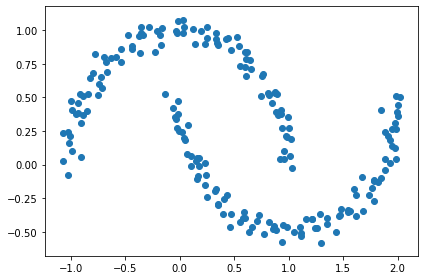

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('images/11_14.png', dpi=300)
plt.show()
# 반달 모양의 데이터셋

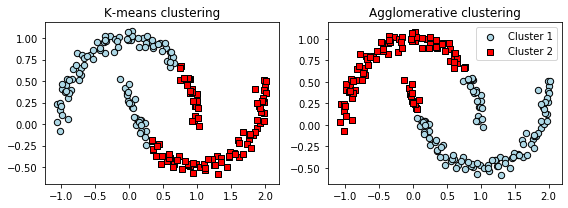

In [24]:
# k-평균과 계층 군집
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

k-평균이 두 클러스터를 구분할 수 없다는 것이 나타난다. 또한, 계층 군집 알고리즘도 이런 복잡한 형태를 잘 처리하지 못한다.

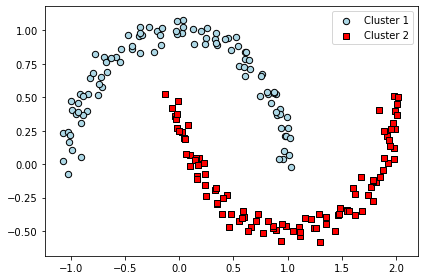

In [25]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
# plt.savefig('images/11_16.png', dpi=300)
plt.show()

DBSCAN 알고리즘은 성공적으로 반달 모양을 감지했다.

DBSCAN의 몇몇 단점도 있다.  
데이터셋에서 훈련 샘플 개수가 고정되어 있다 가정하고, 특성 개수가 늘어나면 차원의 저주로 인한 역효과가 증가한다. 특히 유클리디안 거리 측정을 사용할 때 문제가 된다.  
**차원의 저주**(curse of dimensionality)가 DBSCAN만의 문제는 아니다. 유클리디안 거리 측정을 사용하는 다른 군집 알고리즘에도 영향을 미친다. 예를 들어 k-평균과 계층 군집 알고리즘도 해당도니다.  
DBSCAN이 좋은 군집 결과를 만들려면 두 개의 하이퍼파라미터(MinPts와 $\varepsilon$)를 최적화해야 한다. 